# Homework 7 
#### SHBT 201 Fall 2018
**Chris Buswinka**

------


## Problem 1

---
>For each of the waveforms please answer:
 >   1.	What are the lay terms used to describe the shape of these waveforms?
 >   2.	What is the periodicity of each waveform?*
 >   3.	Discuss why these waveforms are different. Refer to harmonics.
    

In [3]:
import numpy as np
import scipy.stats as  sp
import scipy.io.wavfile as siw
import scipy
from scipy import signal, misc, fftpack
import matplotlib
import matplotlib.pyplot as plt



class processwav():
    def __init__(self):
        self.spectrum = []
        self.freq = []
        self.samplerate = []
        self.data = []
        self.T = []
        self.N = []
        self.time = []
        self.filename = []
        
    def loadwav(self,filename: str):
        '''
        Loads the *.wav file and initializes useful variables. 
        '''
        self.filename = filename
        self.samplerate, self.data = siw.read(filename)
        self.T = 1/self.samplerate
        self.N = len(self.data)
        self.time = np.linspace(0,self.T*self.N,self.N)
        
    def show_wav(self,*args: bool):
        '''
        Displayes the *.wav file in its entirety.  
        *args should be a single input bool. If args is true, create a new matplotlib figure.
        args is true by default. 
        '''
        if len(args) is 0: args = True
        if args == True: plt.figure()
        
        titlestring = 'Waveform of '+self.filename
        plt.tight_layout()
        plt.suptitle(titlestring)
        plt.subplot(2,1,1)
        plt.plot(self.time,self.data)
        plt.xlabel('Time (sec)')
        plt.ylabel('Amplitude')
        plt.subplot(2,1,2)
        plt.plot(self.time[self.time<0.01],self.data[self.time<0.01])
        plt.xlabel('Time (sec)')
        plt.ylabel('Amplitude')
        
    def get_spectrum(self):
        '''
        Performes a spectral analysis through FFT and calculates appropriate frequencies. 
        '''
        self.spectrum = scipy.fftpack.fft(self.data)
        self.freq = np.linspace(0.0, 1.0/(2.0*self.T), self.N//2)
        
    def show_spectrum(self,*args: bool):
        '''
        Displayes the spectrum of file in its entirety.  
        *args should be a single input bool. If args is true, create a new matplotlib figure.
        args is True by default. 
        '''
        if len(args) == 0: args = True
        if args == True: plt.figure()
        if len(self.spectrum) == 0:
            raise Exception(
                    'No value for self.spectrum -- processwav.get_spectrum() must be called before'+
                    ' processwav.showspectrum()')
        plt.grid()
        titlestring = 'Specturm of '+ self.filename
        plt.title(titlestring)
        plt.plot(self.freq, 2.0/self.N * np.abs(self.spectrum[0:self.N//2]))
        plt.xlabel('Frequency (Hz)')
        
    def downsample(self, downsample_index: int):
        '''
        Downsamples wav file by taking regularly spaced data values spaced by downsample_index.
        Setting downsample_index as 1 selects every point. 2, every other point. etc....
        '''
        self.data = self.data[::downsample_index]
        self.N = len(self.data)
        self.samplerate = self.samplerate/downsample_index
        self.T = 1/self.samplerate
        self.time = np.linspace(0,self.T*self.N,self.N)
        
    def returntonorm(self):
        '''
        Reverse effect of downsampling by loading new data.
        '''
        self.loadwav(self.filename)
        
    def compare_spectrum(self,downsample_index: int):
        '''
        Displays the spectrum of the original and downsampled data sets. 
        '''
        self.returntonorm()
        self.get_spectrum()
        self.show_spectrum()
        self.downsample(downsample_index)
        self.get_spectrum()
        self.show_spectrum(False)
        plt.legend(('Original','Downsampled'))
        
    def compare_wav(self,downsample_index: int):
        '''
        Displays the wav files visualization of the original and downsampled data sets. 
        '''
        self.returntonorm()
        self.show_wav()
        self.downsample(downsample_index)
        self.show_wav(False)
        plt.legend(('Original','Downsampled'))
        
    def show_spectrogram(self):
        '''
        Displays the spectrogram of the original and downsampled data sets. 
        '''
        plt.figure()
        matplotlib.pyplot.specgram(self.data, NFFT=256, Fs=self.samplerate)


**Problem 1.1**
We can quickly view the waveforms. 

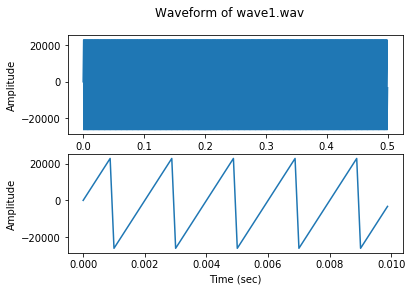

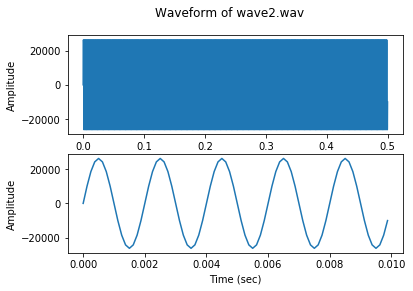

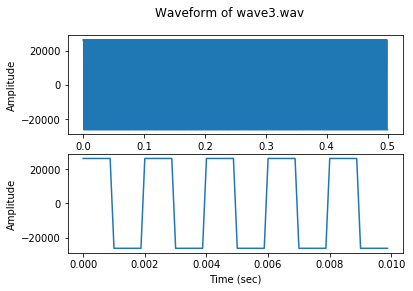

In [4]:
waveform1 = processwav()
waveform1.loadwav('wave1.wav')
waveform1.show_wav()

waveform2 = processwav()
waveform2.loadwav('wave2.wav')
waveform2.show_wav()

waveform3 = processwav()
waveform3.loadwav('wave3.wav')
waveform3.show_wav()

From these visualizations we can say that all waveforms are periodic with no onset and fall within commonly defined waveform types. Wave1 is a sawtooth wave, wave2 is a sinusoid, and wave3 is a square wave.

**Problem 1.2**

We can see from all these visualization, the periodicity is identical between the three at 2 msec. 

**Problem 1.3**

We can perform a fourier analysis on all of these signals in order to discern the frequency components of the signals

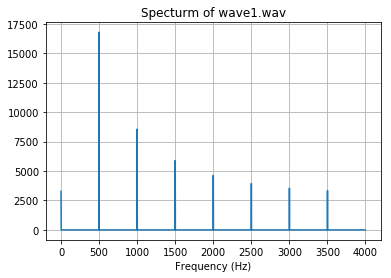

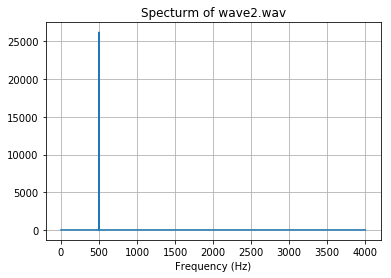

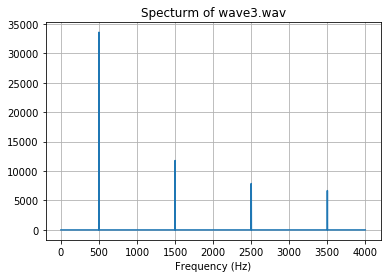

In [5]:
waveform1.get_spectrum()
waveform2.get_spectrum()
waveform3.get_spectrum()

waveform1.show_spectrum()
waveform2.show_spectrum()
waveform3.show_spectrum()

We can see that all of the waveforms have fundamental frequencies at 500 Hz. In the case of wave1.wav, all harmoncs are included, wave2.wav, only the fundamental is included, finally with wave3.wav only the odd harmonics.   

## Problem 2

>What is the smallest number of bits required to represent each waveform?

---

We can greatly compress this waveform by only storing the values of the spectral analysis.  In this case, you could use an two 8bit numbers to represent the magnitude and phase of each harmonic.  Thus to completely define wave1.wav with 8 harmonics, you would need $8_{harmonics} * 8_{bits} * 2_{magnitude/phase}$ for a total of $128$ bits to completely charachterize the signal.  Of course, with a lower bit number, one could squeze away with less storage, however this sacrifices accuracy of reproduction.

The reason this works is the signals are completely periodic; theoretically, an inverse fourier transform can perfectly reproduce the signal with only the spectral information. 




## Problem 3

>Now consider the third waveform. Let's downsample this by taking every other sample from the waveform. In Matlab this would be y(1:2:end) or Python y[::2]. Now one can save this as a 4 KHz file.
   1. Will the spectrum between 0 and 2 KHz be different from the spectrum in that range before downsampling? If yes, how? If not, why not? 
   2. Try the same procedure by taking every 10th sample. Does the spectrum between 0 to 400Hz look any different? If yes, how? If not, why not?


---

**Problem 3.1**

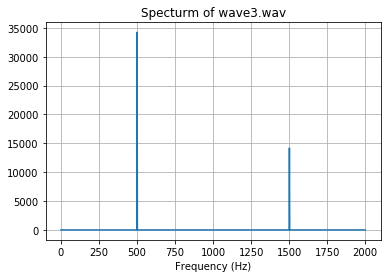

In [6]:
waveform3.downsample(2)
waveform3.get_spectrum()
waveform3.show_spectrum()

We can see that because the sampling rate has artificially been halved information is lost; the fourier transform cannot quanitfy frequency data above the Nyquist frequency. We can plot the spectrum of the downsampled data over the original data:

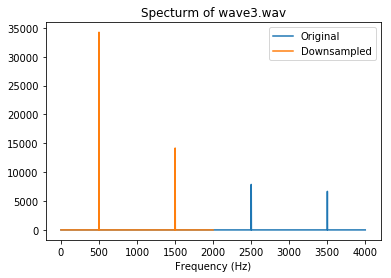

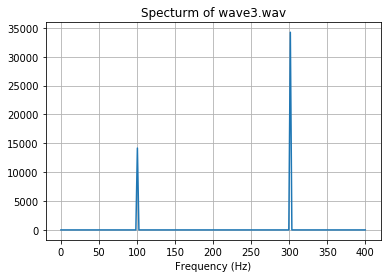

In [7]:
waveform3.compare_spectrum(2)

waveform3.returntonorm()
waveform3.downsample(10)
waveform3.get_spectrum()
waveform3.show_spectrum()

We can see that there is no loss in information below 2000 Hz, however any frequency data above this cutoff is truncated.

**Problem 3.2**

We can downsample even further! 

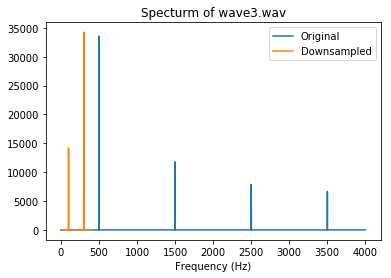

In [59]:
waveform3.compare_spectrum(10)

We can see that there has been even more than a complete loss of information. In fact, aliasing has occured! This can be seen more clealy when plotting the raw waveforms. 

/Users/chrisbuswinka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


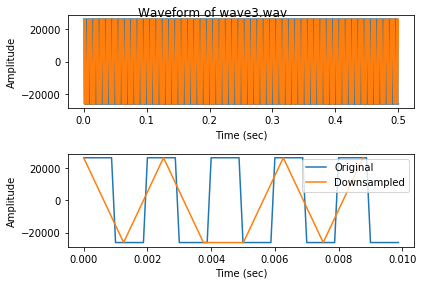

In [60]:
waveform3.compare_wav(10)

We can see that the downsampled waveform is completely different from the original.  Aliasing can drastically affect the results of a fourier analysis; great care must be taken to ensure accurate results. 

## Problem 4

>List two applications each that would call for narrowband and wideband analysis. Explain the situation and why the alternate analysis would not provide the details needed.
_______
Wideband spectral analysis provides excelent temoral resolution at the expense of frequency resolution.  The wide bandwidth of the spectrogram can smear frequency information togther. However, the temporal resolution is sufficient enough to identify energy peaks from the individual vibrations of the vocal folds.  From this information, the fundamnetal frequency of a patients voice can be calculated. 

Narrowband spectral analysis provides good frequency resolution at the expense of temoral resolution. It is sensitive enough to identify each individual harmonic, however individual cycles are lost and sometimes formant information is obscured by the harmonics.  

So, if someone wanted to find out the harmnonics of a spoken vowel, narrowband spectral analyasis would be prefered. However, if one was more interested in formant identification, wideband anaylsis would be the better choice. 


## Problem 5

>How do spectral and cepstral representations vary with respect to representations of source and filter components of a speech waveform? Discuss with respect to the Fourier transform operation.

The cepstral representation of a signal is very usefull in identifying periodic elements in signals.  A very prominent peak occurs along the time axis of the spectral domain corresponding to periodic signals. Additionally, the filter components of speech will be represented in the cepstral domain closer to time 0. In the case of spoken speech, the periodic signals are the vibrations of the vocal folds. This height of this peak with respect to baseline, sometimes called the cepstral peak prominence, is a good measure of breathiness in human speech. 

In a spectral domain there is no eqivalen measure of periodicity, as the segment of speech is assumed to be infinately periodic for a fourier analysis to be done.  Thus the source and filer are summed togther and need to be seperated.  This can be done by a method called Linear Predictive coding. 

## Problem 6
>Linear predictive coding
1.	Why is the residual of an LPC spectrum reflective of the source?
2.	Would you be able to compute an LPC on longer streams of data (an audiobook reading for example) or is it better to compute on smaller samples to build up an envelope? Please explain. 


**Problem 6.1** 

When you run an LPC to find the linear coefficients, you are predicting the future value of a singal based soely on weighted sums of previous responses. If we assume the source filter model is accurate, when vocalizing a sound, the resonance of our mouth should not change as long as the sound is constant. However the

**Problem 6.2**

You theoretically could compute the LPC on long streams of data, however the usefullness of calculating the source vs filter for a long sentence may be lost. The filter for making an 'a' sound, would be different for a 'n' sound.  Additionally, computation time would increase rapidly when attempting to find LPC data on a long segment. 

## Problem 7

>Cepstral representations
1.	What does the cepstral peak prominence (CPP) measure reflect when applied to a stationary signal? Why would voice clinicians care?
2.	Why have MFCCs generally been used as features for speech recognition as compared to LPC coefficients?


**Problem 7.1** The CPP is a measure of periodicity. Thus a stationary signal will cause a strong peak in one area of the cepstral domin.  This is usefull for voice clinicians as it provides a realatively straightforward method of quantifying breathiness and other vocal fold disorders.  Presumably, anthing disrupting the vocal folds function will cause a loss in periodicity, in favor of noise.  This will manifest as a decrease in the CPP and can be interpreted by clinicians. 

**Problem 7.2** MFCCs are features in the frequency domain while LPC coefficients are in the time domain. It is generally considered that spectral domain features are more accurate than time domain features. 


>Dave, Namrata. (2013). Feature extraction methods LPC, PLP and MFCC in speech recognition. International Journal For Advance Research in Engineering And Technology(ISSN 2320-6802). Volume 1. 

## Problem 8

>Watch this video: https://youtu.be/w56RxaX9THY. Why is it that researchers were able to hear the sounds once the recordings were sped up? Explain how this changes the signal that is played back.

When you speed up an aduio file without doing any type of corrections, you effectivly shift the spectrum of whatever sound you are listening to rightward on the frequency axis. So these researchers, took extreemly long recordings of super low frequency signals, and by speeding them up, shifted the spectrum by enough to be audible by humans!  In short, if you take a 1Hz over 100 seconds, there are 100 cycles presented.  If you compress the 100 seconds to 1 second, the 100 cycles remain, just over a shorter time frame. (100 cycles per second is 100Hz) Thus, we would hear a 100Hz tone!